In [1]:
import torch 
from autoencoder import Autoencoder
from utils import get_mnist_train_loader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
import tqdm 

In [2]:
input_dim = 28*28 
hidden_dim = 128 
latent_dim = 64 
batch_size = 64 

# Instantiate the model and load the state dictionary
model = Autoencoder(
    input_dim = input_dim, 
    hidden_dim = hidden_dim, 
    latent_dim = latent_dim
)
model.load_state_dict(
    torch.load('autoencoder.pth')
)
test_loader = get_mnist_train_loader(
    train = False, 
    shuffle = False, 
    batch_size = batch_size
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 14076693.47it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 345933.96it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3865148.79it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1159849.54it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
# Extracting the latent space representations
latent_representations = []
labels = []

with torch.no_grad():
    for i, data in tqdm.tqdm(enumerate(test_loader)): 
        image, label = data
        image = image.view(image.size(0), -1)  
        latent_rep = model.encoder(image)
        latent_representations.append(latent_rep)
        labels.append(label)

157it [00:00, 272.10it/s]


In [5]:
latent_representations = torch.cat(latent_representations).cpu().numpy()
labels = torch.cat(labels).cpu().numpy()

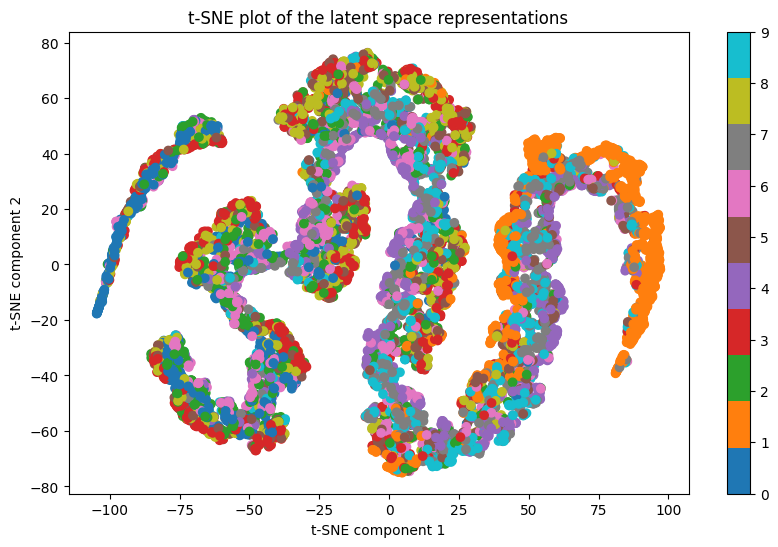

In [6]:
# Performing t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(latent_representations)

# Plotting the t-SNE results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='tab10')
plt.colorbar(scatter)
plt.title("t-SNE plot of the latent space representations")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()

In [22]:
import json 
import numpy as np 

In [23]:
tsne_data = {
    "component_1": list(tsne_results[:, 0]), 
    "component_2": list(tsne_results[:, 1]), 
    "labels": list(labels)
}

def convert_to_native_types(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, np.generic):
        return obj.item()
    else:
        raise TypeError("Unserializable object {} of type {}".format(obj, type(obj)))

In [1]:
import json 
import pandas as pd 
with open("./tsne_json.json", "r") as infile: 
    data = json.load(infile)

In [2]:
df = pd.DataFrame(data)
# df.columns = ["Component 1", "Component 2", "labels"]

In [3]:
df.head()

,component_1,component_2,labels
0,51.301548,-36.815456,7
1,-56.842777,14.268388,2
2,92.405678,-15.305650,1
3,-79.673851,-32.738495,0
4,19.126715,-56.375751,4


In [4]:
df.shape

(10000, 3)

In [5]:
df["data"] = df.apply(lambda row: {"x": row[0], "y": row[1]}, axis = 1)

/var/folders/lb/pskgtvls62dbtqb4_b8_f_8c0000gn/T/ipykernel_84596/120226524.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["data"] = df.apply(lambda row: {"x": row[0], "y": row[1]}, axis = 1)


In [6]:
df.head()

,component_1,component_2,labels,data
0,51.301548,-36.815456,7,"{'x': 51.30154800415039, 'y': -36.81545639038086}"
1,-56.842777,14.268388,2,"{'x': -56.842777252197266, 'y': 14.26838779449..."
2,92.405678,-15.305650,1,"{'x': 92.40567779541016, 'y': -15.305649757385..."
3,-79.673851,-32.738495,0,"{'x': -79.6738510131836, 'y': -32.738494873046..."
4,19.126715,-56.375751,4,"{'x': 19.1267147064209, 'y': -56.37575149536133}"


In [7]:
data_reshaped = dict()

for i in range(10): 
    class_ = df[df["labels"] == i].copy() 
    d = df[df["labels"] == i]["data"].values.tolist()
    l = len(d)
    data_reshaped.update({
        f"class_{i}": df[df["labels"] == i]["data"].values.tolist()[: l//2]
    })


In [8]:
with open("./tsne_json_reshaped.json", "w") as outfile: 
    json.dump(data_reshaped, outfile, indent = 4)